# Support Vector Machine for Classification
Support Vector Machine (SVM) for binary classification computes a hyperplane (in some higher or infinete dimensional feature space) such that the samples of different classes lies in different side of the hyperplane. In other word, the hyperplane (almost always) seperates the samples of different classes. Thus, it computes a hyperplane $(\beta^*, \beta^*_0)\in\mathbb{R}^{d+1}$ such that for a input sample $\mathbf{x}\in\mathbb{R}^d$, $(\beta^*)^T\mathbf{x}-\beta^*_0 < 0$ implies $\mathbf{x}$ belongs to class $1$ and  to class $2$ otherwise.
Moreover, among all the seperating hyperplanes, it find that hyperplane which maximizes the distance between the hyperplane and the nearest samples.

## The Optimization Problem
Given a training dataset of $n$ points
$$(\mathbf{x}_0, y_0), (\mathbf{x}_1, y_1), \ldots, (\mathbf{x}_{n-1}, y_{n-1})$$
where $\mathbf{x}_i\in\mathbb{R}^d$ and $y_i\in\{-1, 1\}$ for all $i=0, 1, \ldots, n-1$, the optimal hyperplane $(\beta^*, \beta^*_0)$ is found by solving the following optimization problem:
\begin{align}
  \underset{\beta, \beta_0, \xi}{\text{minimize}} &\quad \frac{C}{n}\sum_{i=0}^{n-1} \xi_i + \frac{1}{2}||\beta||_2^2 \\
  \text{subject to} &\quad y_i(\beta^T\mathbf{x}-\beta_0) \ge 1 - \xi_i, \xi_i \ge 0, \qquad \forall i
\end{align}
Alternatively, the above optimization problem can be rewritten as
\begin{align}
  \underset{\beta, \beta_0}{\text{minimize}} &\quad \frac{C}{n}\sum_{i=0}^{n-1} \text{max}(0, 1-y_i(\beta^T\mathbf{x}-\beta_0)) + \frac{1}{2}||\beta||_2^2
\end{align}

## The Dual Form
The dual form of the above optimization problem is given by
\begin{align}
\underset{\alpha\in\mathbb{R}^n}{\text{maximize}} &\quad \sum_{i=0}^{n-1}\alpha_i -\frac{1}{2}\sum_{i=0}^{n-1}\sum_{j=0}^{n-1}y_iy_j\alpha_i\alpha_j\mathbf{x}_i^T \mathbf{x}_j \\
\text{subject to} &\quad \sum_{i=0}^{n-1} \alpha_iy_i = 0 \text{ and } 0\le \alpha_i \le \frac{C}{n} \quad \forall i
\end{align}
The $\beta^*$ can be computed from the dual solution $\alpha^*$ using the
formula
$$\beta^* = \sum_{i=0}^{n-1} y_i\alpha_i^*\mathbf{x}_i$$.
The $\beta_0^*$ can be computed by first finding a sample $(\tilde{\mathbf{x}}, \tilde{y})$ on the margin boundary and solving the equation:
$$\tilde{y}((\beta^*)^T\tilde{\mathbf{x}}-\beta^*_0) = 1\quad\text{ or }\quad \beta^*_0 = (\beta^*)^T\tilde{\mathbf{x}} - 1/\tilde{y}$$.

## The Kernelized Dual Form
The SVM formulation can be used to perform classification (and also regression) on some transformed feature space by replacing the term $\mathbf{x}_i^T\mathbf{x}_j$ by a valid kernel $k(\mathbf{x}_i, \mathbf{x}_j)$ in the dual formuation, resulting into the following dual optimization:
\begin{align}
\underset{\alpha\in\mathbb{R}^n}{\text{maximize}} &\quad \sum_{i=0}^{n-1}\alpha_i -\frac{1}{2}\sum_{i=0}^{n-1}\sum_{j=0}^{n-1}y_iy_j\alpha_i\alpha_jk(\mathbf{x}_i, \mathbf{x}_j) \\
\text{subject to} &\quad \sum_{i=0}^{n-1} \alpha_iy_i = 0 \text{ and } 0\le \alpha_i \le \frac{C}{n} \quad \forall i
\end{align}
Note that, for a valid kernel $k(\cdot, \cdot)$, there exist a implicit feature reressentation $\phi(\mathbf{x})$ for any sample $\mathbf{x}$ such that $k(\mathbf{x}_i, \mathbf{x}_j) = \phi^T(\mathbf{x}_i)\phi(\mathbf{x}_j)$. Thus, once the optimal solution $\alpha^*$ is obtained by solving the above problem, the prediction for a new sample $\hat{\mathbf{x}}$ without explicitly computing $\beta^*$ can be obtained
by
$$
\hat{y} = (\beta^*)^T\phi(\mathbf{x}) - \beta^*_0 = \sum_{i=0}^{n-1}y_i\alpha_i^*k(\mathbf{x}, \mathbf{x}_i) - \beta^*_0
$$
where $\beta^*_0$ is computed by first finding a sample $(\tilde{\mathbf{x}}, \tilde{y})$ which lies on the margin boundary, and then solving the equation
$$
\tilde{y}((\beta^*)^T\phi(\mathbf{x})-\beta^*_0) = 1 \text{ or }\quad \tilde{y}\sum_{i=0}^{n-1}\alpha_i^*k(\mathbf{x}, \mathbf{x}_i) - \tilde{y}\beta_0^* = 1 \text{ or }\quad \beta_0^* = \sum_{i=0}^{n-1}\alpha_i^*k(\mathbf{x}, \mathbf{x}_i) - 1/\tilde{y}
$$

Since, the above prediction does not involve explicit computation of the new feature repressentation $\phi(\mathbf{x})$, one can "efficiently" perform classification (or regression) on an implicit higher (or infinite) dimensional feature space by selecting an appropriate kernel function. Moreover, by selecting a kernel function $k(\cdot, \cdot)$ such the corresponding feature repressentation $\phi(\mathbf{x})$ is a non-linear transformation of the original feature repressentation $\mathbf{x}$, one can perform non-linear classification or regression. Additionally, for many datasets, the samples are repressented in some non-vectorial form like tree, graph or sequence. For those datasets, getting any feature representation for the samples in vectorial form is difficult. However, one can still able to build a classifier or regressor on those datasets by appropriately define a kernel function (over the input objects like trees, graphs or sequences). Scikit-learn provides the class sklearn.svm.SVC for SVM. A complete documentation of the same can be found here(https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).


## Binary Classification using SVM

### Importing the necessary modules

In [1]:
import numpy as np
from sklearn.svm import SVC

### The training data

In [2]:
X = np.array([[-1, -1],
              [-2, -1],
              [1, 1],
              [2, 1]])
y = np.array([1, 1, 2, 2])

### Training the model

In [3]:
clf = SVC(C=1.0,
          kernel='rbf', # One of {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
                        # or an user defined function
          degree=3,     # Used only for 'poly' kernel
          gamma='auto',  # one of {‘scale’, ‘auto’} or user input
          probability = False)
clf.fit(X, y)

SVC(gamma='auto')

### Prediction

In [4]:
print(clf.predict([[0.8, 1]]))

[2]


### The Attributes

In [5]:
# clf.coef_  # Only for linear kernel
print(clf.dual_coef_.shape)
print(clf.intercept_.shape)

(1, 4)
(1,)


In [6]:
print(clf.support_)
print(clf.support_vectors_)

[0 1 2 3]
[[-1. -1.]
 [-2. -1.]
 [ 1.  1.]
 [ 2.  1.]]


## Multiclass Classification using SVM

### Preparing the dataset

In [7]:
X = [[0], [1], [2], [3]]
y = [0, 1, 2, 3]

### The training

In [8]:
clf = SVC(C=1.0,
          kernel='linear',
          decision_function_shape='ovo' # one of {‘ovo’ (for one-versus-one), ‘ovr’ (one-versus-rest)}
          )
clf.fit(X, y)

SVC(decision_function_shape='ovo', kernel='linear')

### The prediction

In [9]:
import matplotlib.pyplot as plt

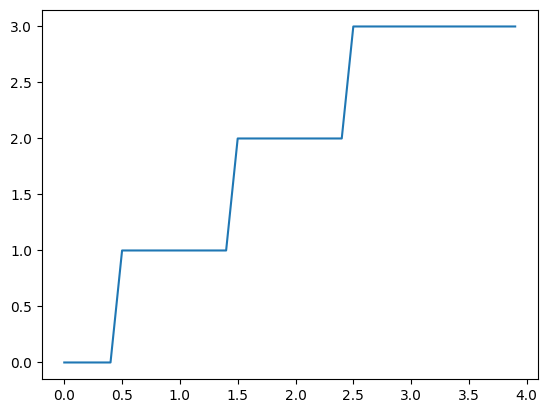

In [10]:
x_test = np.arange(0, 4, 0.1).reshape([-1, 1])
y_pred = clf.predict(x_test)
plt.plot(x_test, y_pred)
plt.show()

### The attribute

In [12]:
print(clf.coef_.shape)
print(clf.intercept_.shape)

(6, 1)
(6,)


In [13]:
print(clf.coef_)
print(clf.intercept_)

[[-1.        ]
 [-1.        ]
 [-0.66666667]
 [-1.        ]
 [-1.        ]
 [-1.        ]]
[0.5 1.  1.  1.5 2.  2.5]


# Effect of the C Hyperparameter
The original source can be found here: https://scikit-learn.org/stable/auto_examples/svm/plot_svm_margin.html#sphx-glr-auto-examples-svm-plot-svm-margin-py

## Importing the modules

In [11]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import svm

## Preparing the dataset

In [ ]:
# we create 40 separable points
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

In [ ]:

regs = (1, 0.05)
fig, axs = plt.subplots(1, 2)
# fit the model
for i, penalty in enumerate(regs):
    clf = svm.SVC(kernel="linear", C=penalty)
    clf.fit(X, Y)

    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
    # 2-d.
    margin = 1 / np.sqrt(np.sum(clf.coef_**2))
    yy_down = yy - np.sqrt(1 + a**2) * margin
    yy_up = yy + np.sqrt(1 + a**2) * margin

    # plot the line, the points, and the nearest vectors to the plane
    axs[i].plot(xx, yy, "k-")
    axs[i].plot(xx, yy_down, "k--")
    axs[i].plot(xx, yy_up, "k--")

    axs[i].scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=80,
        facecolors="none",
        zorder=10,
        edgecolors="k",
        cmap=plt.get_cmap("RdBu"),
    )
    axs[i].scatter(
        X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.get_cmap("RdBu"), edgecolors="k"
    )

    x_min = -4.8
    x_max = 4.2
    y_min = -6
    y_max = 6

    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # Put the result into a contour plot
    axs[i].contourf(XX, YY, Z, cmap=plt.get_cmap("RdBu"), alpha=0.5, linestyles=["-"])

    axs[i].set_xlim(x_min, x_max)
    axs[i].set_xlim(y_min, y_max)
    axs[i].set_aspect(0.6)

    axs[i].set_title("C = %s"%penalty)
    axs[i].set_xticks(())
    axs[i].set_yticks(())

fig.tight_layout()

plt.show()

# Nonlinear Classification on not linearly separable data
The original source can be found here: https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html#sphx-glr-auto-examples-svm-plot-svm-kernels-py

## Importing the modules

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import svm

## Preparing the dataset

In [ ]:
# Our dataset and targets
X = np.c_[
    (0.4, -0.7),
    (-1.5, -1),
    (-1.4, -0.9),
    (-1.3, -1.2),
    (-1.1, -0.2),
    (-1.2, -0.4),
    (-0.5, 1.2),
    (-1.5, 2.1),
    (1, 1),
    # --
    (1.3, 0.8),
    (1.2, 0.5),
    (0.2, -2),
    (0.5, -2.4),
    (0.2, -2.3),
    (0, -2.7),
    (1.3, 2.1),
].T
Y = [0] * 8 + [1] * 8

In [ ]:


fig, axs = plt.subplots(1, 3, figsize=(12, 4))
# fit the model
for i, kernel in enumerate(("linear", "poly", "rbf")):
    clf = svm.SVC(kernel=kernel, degree=3, gamma=2)
    clf.fit(X, Y)

    # plot the line, the points, and the nearest vectors to the plane
    #plt.figure(fignum, figsize=(4, 3))
    #plt.clf()

    axs[i].scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=80,
        facecolors="none",
        zorder=10,
        edgecolors="k",
    )
    axs[i].scatter(X[:, 0], X[:, 1], c=Y, zorder=10, edgecolors="k")

    x_min = -3
    x_max = 3
    y_min = -3
    y_max = 3

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    axs[i].pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    axs[i].contour(
        XX,
        YY,
        Z,
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
        levels=[-0.5, 0, 0.5],
    )

    axs[i].set_title(kernel)
    axs[i].set_xlim(x_min, x_max)
    axs[i].set_ylim(y_min, y_max)
    axs[i].set_aspect(0.6)

    axs[i].set_xticks(())
    axs[i].set_yticks(())

fig.tight_layout()

plt.show()

# Digit Classification using SVM
The original source code can be found here: https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py

In [ ]:
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split

## Digits dataset
The digits dataset consists of 8x8 pixel images of digits. The images attribute of the dataset stores 8x8 arrays of grayscale values for each image. We will use these arrays to visualize the first 4 images. The target attribute of the dataset stores the digit each image represents and this is included in the title of the 4 plots below.

In [ ]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(4, 1))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Sample:%i" % label)
plt.tight_layout()

## Classification

In [ ]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

## Predictiom

In [ ]:
# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

### Visualizing the predictiom

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(4, 1))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Pred: {prediction}")

plt.tight_layout()

### The classification report

In [ ]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

### Plotting the confusion matrix

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

# The Effect of Gamma Parameter in RBF Kernel
The source code can be found here: https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html#sphx-glr-auto-examples-svm-plot-rbf-parameters-py

In [ ]:
import numpy as np
from matplotlib.colors import Normalize


class MidpointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

## Load and prepare data set

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

Dataset for decision function visualization: we only keep the first two features in X and sub-sample the dataset to keep only 2 classes and make it a binary classification problem.

In [ ]:
X_2d = X[:, :2]
X_2d = X_2d[y > 0]
y_2d = y[y > 0]
y_2d -= 1

It is usually a good idea to scale the data for SVM training. We are cheating a bit in this example in scaling all of the data, instead of fitting the transformation on the training set and just applying it on the test set.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_2d = scaler.fit_transform(X_2d)

## Training the classifiers

For an initial search, a logarithmic grid with basis 10 is often helpful. Using a basis of 2, a finer tuning can be achieved but at a much higher cost.

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
from sklearn.svm import SVC

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X, y)

print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)

Now we need to fit a classifier for all parameters in the 2d version (we use a smaller set of parameters here because it takes a while to train)

In [ ]:
C_2d_range = [1e-2, 1, 1e2]
gamma_2d_range = [1e-1, 1, 1e1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X_2d, y_2d)
        classifiers.append((C, gamma, clf))

## Visualization

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

plt.figure(figsize=(8, 6))
xx, yy = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))
for k, (C, gamma, clf) in enumerate(classifiers):
    # evaluate decision function in a grid
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # visualize decision function for these parameters
    plt.subplot(len(C_2d_range), len(gamma_2d_range), k + 1)
    plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)), size="medium")

    original_cmap = plt.cm.RdBu
    lighter_cmap = ListedColormap(original_cmap(np.linspace(0.3, 0.7, 256)))

    # visualize parameter's effect on decision function
    plt.pcolormesh(xx, yy, -Z>0, cmap=lighter_cmap)
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_2d, cmap=plt.cm.RdBu_r, edgecolors="k")
    plt.xticks(())
    plt.yticks(())
    plt.axis("tight")

scores = grid.cv_results_["mean_test_score"].reshape(len(C_range), len(gamma_range))

## Plots of the RBF Kernel

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# Generate data points for the x-axis
x = np.linspace(-5, 5, 400)

# Define a range of gamma values
gamma_values = [0.1, 1.0, 10.0]

# Create the plot
plt.figure(figsize=(5, 3))

for gamma in gamma_values:
    # Calculate the pairwise distances between data points and the origin
    distances = cdist(x.reshape(-1, 1), np.array([[0]]))

    # Calculate the RBF kernel values
    rbf_kernel = np.exp(-gamma * distances ** 2)

    plt.plot(x, rbf_kernel, label=f'γ = 10^{np.log10(gamma)}')

plt.title('Radial Basis Function (RBF) Kernel for Different Gamma Values')
plt.xlabel('Distance from Origin')
plt.ylabel('Kernel Value')
plt.legend()
plt.grid(True)
plt.show()
